In [1]:
# Importamos las bibliotecas necesarias
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# Creamos un conjunto de datos ficticio con características:
# - Tamaño de la casa en metros cuadrados (X1)
# - Número de habitaciones (X2)
# - Precio de la casa (y) = 30000 * X1 + 10000 * X2 + 50000 (con algo de ruido)

np.random.seed(42)
tamanio = np.random.randint(50, 150, size=(100, 1))  # Tamaño en m²
habitaciones = np.random.randint(1, 5, size=(100, 1))  # Número de habitaciones
precio = 30000 * tamanio + 10000 * habitaciones + 50000 + np.random.randn(100, 1) * 10000  # Precio con ruido

In [3]:
# Juntamos las características en una matriz de entrada (X)
X = np.hstack([tamanio, habitaciones])  # X1: tamaño, X2: habitaciones
y = precio  # Etiqueta: precio

# Dividimos los datos en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creamos el modelo de regresión lineal
modelo = LinearRegression()

# Entrenamos el modelo
modelo.fit(X_train, y_train)

# Realizamos predicciones en el conjunto de prueba
y_pred = modelo.predict(X_test)

Error cuadrático medio (MSE): 117207507.33292505
Coeficiente de determinación (R²): 0.9998107865146977
Coeficientes del modelo: [[30031.37715094 10095.28546736]]
Intersección (ordenada al origen): [48052.21348057]


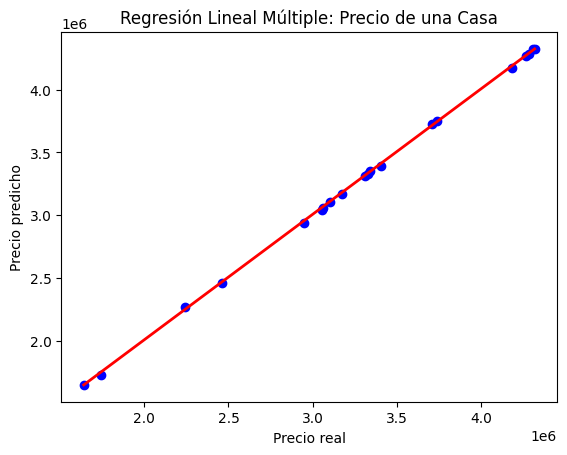

In [4]:

# Evaluamos el modelo
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Error cuadrático medio (MSE): {mse}")
print(f"Coeficiente de determinación (R²): {r2}")
print(f"Coeficientes del modelo: {modelo.coef_}")
print(f"Intersección (ordenada al origen): {modelo.intercept_}")

# Visualizamos las predicciones versus los valores reales (Precio)
plt.scatter(y_test, y_pred, color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_pred), max(y_pred)], color='red', lw=2)
plt.xlabel('Precio real')
plt.ylabel('Precio predicho')
plt.title('Regresión Lineal Múltiple: Precio de una Casa')
plt.show()